### Linear State Space Models

In [5]:
using LinearAlgebra, Statistics
using QuantEcon, Plots
gr(fmt=:png);

┌ Info: Precompiling QuantEcon [fcd29c91-0bd7-5a09-975d-7ac3f643a60c]
└ @ Base loading.jl:1260


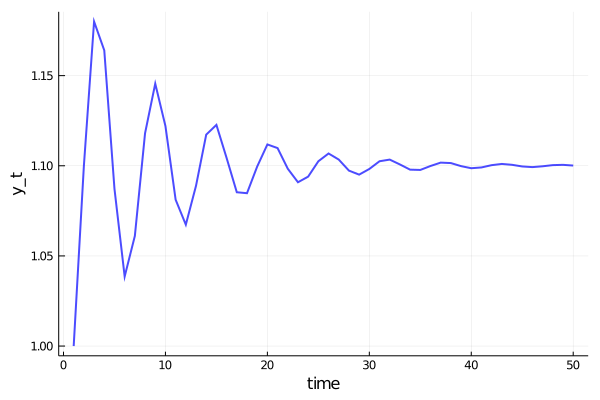

In [8]:

ϕ_0, ϕ_1, ϕ_2 = 1.1, 0.8, -0.8
A = [1.0 0.0 0.0; ϕ_0 ϕ_1 ϕ_2; 0.0 1.0 0.0]
C = zeros(3)
G = [0.0 1.0 0.0]



lss = LSS(A, C, G; mu_0 = ones(3))
x, y = simulate(lss, 50)
plot(dropdims(y, dims = 1), color = :blue, linewidth = 2, alpha = 0.7)
plot!(xlabel="time", ylabel = "y_t", legend = :none)

A type that describes the Gaussian Linear State Space Model
of the form:
```math
    x_{t+1} = A x_t + C w_{t+1} \\
    y_t = G x_t + H v_t
```
where ``{w_t}`` and ``{v_t}`` are independent and standard normal with dimensions
`k` and `l` respectively.  The initial conditions are ``\mu_0`` and ``\Sigma_0`` for ``x_0
\sim N(\mu_0, \Sigma_0)``. When ``\Sigma_0=0``, the draw of ``x_0`` is exactly ``\mu_0``.
#### Fields
- `A::Matrix` Part of the state transition equation.  It should be `n x n`
- `C::Matrix` Part of the state transition equation.  It should be `n x m`
- `G::Matrix` Part of the observation equation.  It should be `k x n`
- `H::Matrix` Part of the observation equation.  It should be `k x l`
- `k::Int` Dimension
- `n::Int` Dimension
- `m::Int` Dimension
- `l::Int` Dimension
- `mu_0::Vector` This is the mean of initial draw and is of length `n`
- `Sigma_0::Matrix` This is the variance of the initial draw and is `n x n` and
                    also should be positive definite and symmetric
